In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Use Starbucks Survey Data to Get Information on Target Audience

A quick look into Demographics and Marketing Channels

In [2]:
starbucks_df = pd.read_csv('starbucks_data/Starbucks satisfactory survey.csv')

In [3]:
starbucks_df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


Column to start storing Marketing Data

In [4]:
starbucks_df['Awareness'] = starbucks_df['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].str.split(";")

In [5]:
marketing = []
marketing_df = pd.DataFrame()
for res in starbucks_df['Awareness']:
    if isinstance(res, float):
        pass
    else:
        for answer in res:
            if answer not in marketing:
                marketing.append(answer)
                marketing_df[answer] = [1]
            else:
                marketing_df[answer] = marketing_df[answer] + 1

In [6]:
marketing_df

,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",In Store displays,Billboards,Through friends and word of mouth,Application offer,Never hear
0,35,89,18,7,21,11,49,1,1


In [7]:
marketing

['Starbucks Website/Apps',
 'Social Media',
 'Emails',
 'Deal sites (fave, iprice, etc...)',
 'In Store displays',
 'Billboards',
 'Through friends and word of mouth',
 'Application offer',
 'Never hear']

In [8]:
marketing_df = marketing_df[['Social Media', 'Through friends and word of mouth','Starbucks Website/Apps', 'In Store displays', 'Emails']]

In [9]:
marketing_df['Other'] = [20]

<ipython-input-9-68dade383c39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df['Other'] = [20]


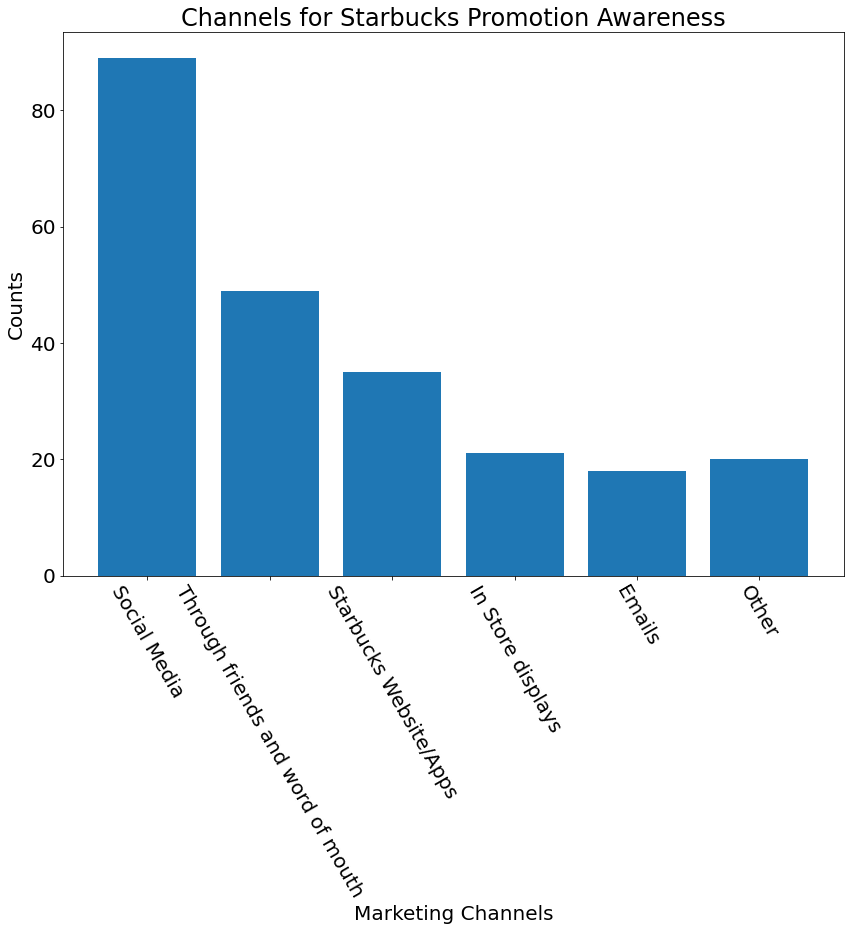

In [14]:
plt.figure(figsize=(14, 10))
plt.bar(marketing_df.columns, marketing_df.iloc[0])
plt.title("Channels for Starbucks Promotion Awareness")
plt.xlabel("Marketing Channels")
plt.ylabel("Counts")
plt.xticks(rotation = -60)
plt.rcParams.update({'font.size': 20})
plt.show()

Studying unique age ranges to help discover Target Persona

In [15]:
values, counts = np.unique(starbucks_df['2. Your Age'], return_counts=True)

In [16]:
normalized_counts = counts/counts.sum()

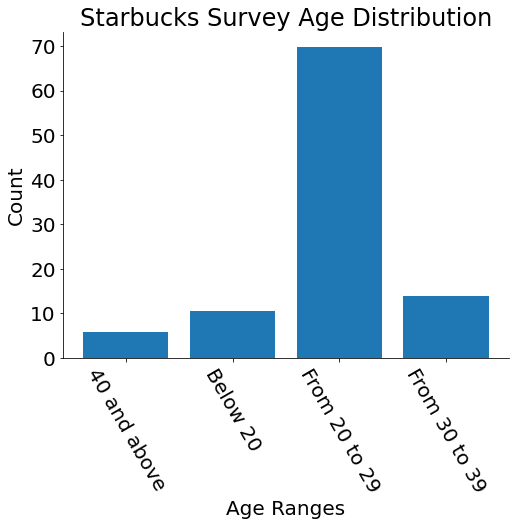

In [17]:
plt.figure(figsize=(8,6))
plt.bar(values, normalized_counts * 100)
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.xticks(rotation = -60)
sns.despine()
plt.title("Starbucks Survey Age Distribution")
plt.show()

## Use Starbucks Rewards Data to Get Rewards and Challenge Insights

Get insights on Rewards and Challenges

In [18]:
portfolio_df = pd.read_json('starbucks_data/portfolio.json', lines=True)

In [19]:
portfolio_df

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [20]:
transcript_df = pd.read_json('starbucks_data/transcript.json', lines=True)

In [21]:
transcript_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [23]:
user_reward_df = transcript_df.join(portfolio_df, rsuffix='reward').copy()

In [24]:
user_reward_df

,person,event,value,time,reward,channels,difficulty,duration,offer_type,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,10.0,"[email, mobile, social]",10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,0.0,"[web, email, mobile]",0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,5.0,"[web, email, mobile]",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,5.0,"[web, email]",20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,NaN,NaN,NaN,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,NaN,NaN,NaN,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,NaN,NaN,NaN,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
user_reward_df['difficulty'].unique()

array([10.,  0.,  5., 20.,  7., nan])

In [27]:
values, counts = np.unique(user_reward_df['difficulty'], return_counts=True)

In [40]:
values = values[:5]

In [41]:
values

array([ 0.,  5.,  7., 10., 20.])

In [42]:
counts = counts[:5]

In [43]:
normalized_counts = counts/counts.sum()

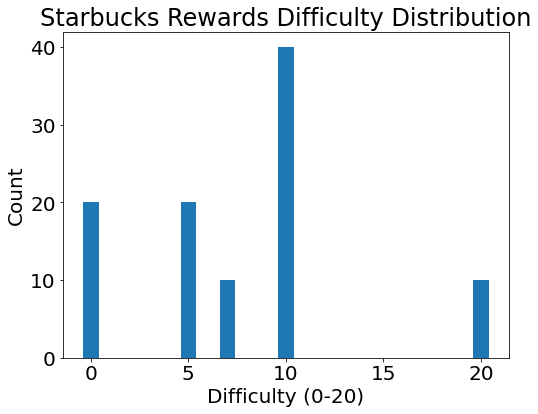

In [46]:
plt.figure(figsize=(8,6))
plt.bar(values, normalized_counts * 100)
plt.xlabel('Difficulty (0-20)')
plt.ylabel('Count')
plt.title("Starbucks Rewards Difficulty Distribution")
plt.show()

In [26]:
user_reward_df['difficulty'].isna().mean()

0.9999673771914371

An average of ~1 difficulty reward out of 20, "suprise" should be easy to reach after reward milestones

## Use Coupon Data to Show Discounts and Transactions have Positive Effects on Sales

In [48]:
customer_transaction_df = pd.read_csv('coupon_data/customer_transaction_data.csv')

In [49]:
customer_transaction_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [50]:
customer_transaction_df['Discounted'] = np.where(customer_transaction_df['other_discount'] <0, 1, 0)

In [51]:
customer_transaction_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,Discounted
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,1
...,...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0,1
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0,1
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0,1
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0,0


In [52]:
customer_transaction_df.groupby('Discounted')['selling_price'].mean()

Discounted
0    112.842585
1    116.315566
Name: selling_price, dtype: float64

### Perform Hypothesis Testing

In [57]:
discounted_df = customer_transaction_df[customer_transaction_df['Discounted'] == 1]

In [58]:
discounted_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,Discounted
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,1
5,2012-01-02,1501,57397,1,71.24,-28.14,0.0,1
...,...,...,...,...,...,...,...,...
1324559,2013-06-30,1129,2142,1,146.04,-117.90,0.0,1
1324560,2013-06-30,1129,2423,1,81.57,-7.12,0.0,1
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0,1
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0,1


In [61]:
discounted_sales = []
for i in discounted_df['selling_price']:
    discounted_sales.append(i)

In [70]:
max(discounted_sales)

17809.64

In [71]:
min(discounted_sales)

0.36

In [75]:
sum(discounted_sales)/len(discounted_sales)

116.31556613629178

In [ ]:
discounted_sales

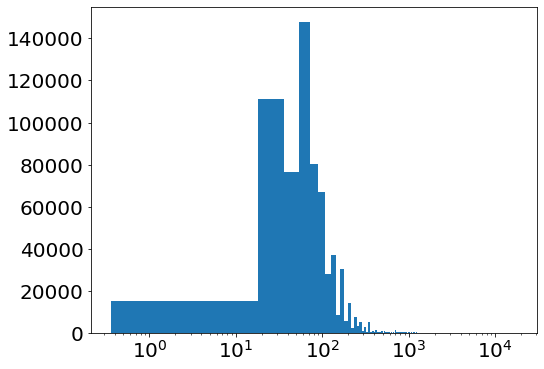

In [84]:
plt.figure(figsize=(8,6))
plt.hist(discounted_sales, bins=1000)
plt.xscale('log')
plt.show()

While not an ideal normal distribution, I believe we can continue with this data.

In [59]:
undiscounted_df = customer_transaction_df[customer_transaction_df['Discounted'] == 0]

In [60]:
undiscounted_df

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,Discounted
3,2012-01-02,1501,33647,1,67.32,0.0,0.0,0
7,2012-01-02,857,14930,1,110.07,0.0,0.0,0
9,2012-01-02,67,10537,3,32.06,0.0,0.0,0
12,2012-01-02,67,32083,1,8.90,0.0,0.0,0
13,2012-01-02,751,10423,1,81.57,0.0,0.0,0
...,...,...,...,...,...,...,...,...
1324547,2013-06-30,1129,281,1,85.13,0.0,0.0,0
1324553,2013-06-30,1129,861,1,74.45,0.0,0.0,0
1324557,2013-06-30,1129,1736,1,95.82,0.0,0.0,0
1324564,2013-06-30,1129,46984,1,95.82,0.0,0.0,0


In [63]:
undiscounted_sales = []
for i in undiscounted_df['selling_price']:
    undiscounted_sales.append(i)

In [64]:
undiscounted_sales

[67.32,
 110.07,
 32.06,
 8.9,
 81.57,
 127.88,
 127.88,
 53.43,
 63.76,
 63.76,
 152.81,
 131.08,
 35.26,
 92.26,
 170.62,
 186.65,
 99.02,
 156.02,
 31.7,
 35.26,
 67.32,
 88.69,
 186.65,
 45.24,
 90.47,
 106.5,
 135.0,
 163.5,
 35.26,
 248.98,
 302.41,
 53.43,
 95.82,
 35.26,
 70.53,
 106.5,
 747.66,
 35.26,
 70.53,
 163.5,
 19.59,
 17.81,
 134.64,
 67.32,
 49.16,
 38.83,
 34.2,
 35.26,
 336.25,
 1045.09,
 42.39,
 38.83,
 131.44,
 82.99,
 113.63,
 127.88,
 74.8,
 88.69,
 213.01,
 67.32,
 70.88,
 49.16,
 106.5,
 63.76,
 21.02,
 42.39,
 70.88,
 426.73,
 152.45,
 106.5,
 85.13,
 124.31,
 284.6,
 783.28,
 35.26,
 78.01,
 17.81,
 142.12,
 53.43,
 212.3,
 89.05,
 53.43,
 199.12,
 92.26,
 53.43,
 45.95,
 38.83,
 67.32,
 70.88,
 291.73,
 105.79,
 291.73,
 211.94,
 8.9,
 45.95,
 45.95,
 127.52,
 78.01,
 49.51,
 88.69,
 99.38,
 124.31,
 17.81,
 88.69,
 106.5,
 142.12,
 142.12,
 234.38,
 99.38,
 23.87,
 142.12,
 85.13,
 74.45,
 70.88,
 113.63,
 88.69,
 284.25,
 106.15,
 313.1,
 88.69,
 53.07,


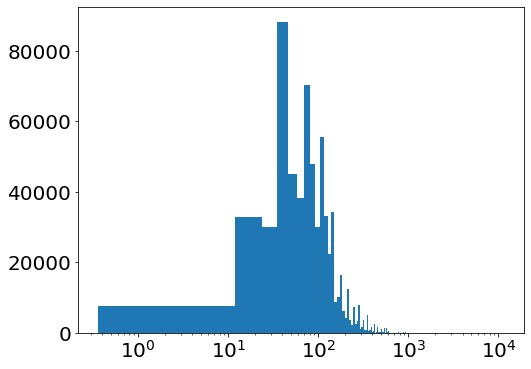

In [86]:
plt.figure(figsize=(8,6))
plt.hist(undiscounted_sales, bins=1000)
plt.xscale('log')
plt.show()

We see a similar distribution to discounted sales; we will continue performing hypothesis testing with the log values.

In [92]:
log_discounted_sales = np.log10(discounted_sales)

In [93]:
log_undiscounted_sales = np.log10(undiscounted_sales)

In [94]:
len(log_discounted_sales)

671649

In [95]:
len(log_undiscounted_sales)

652917

As the two lists are of unequal length, we cannot perform any hypothesis testing without making changes. Thus, we will sacrifice some statistical power to reduce `log_discounted_sales` to an equal length of `log_undiscounted_sales`.

In [96]:
from random import sample

In [101]:
sample_lds = sample(list(log_discounted_sales), 652917)

In [102]:
len(sample_lds)

652917

### Paired Two-Sample T-test

In [89]:
from scipy import stats

In [103]:
stats.ttest_rel(sample_lds, log_undiscounted_sales)

Ttest_relResult(statistic=-19.332828727922326, pvalue=3.0009530211137662e-83)

Discounted products saw an average of 116 spent, whereas undiscounted products saw an average of 113. With 1,234,566 data points, this difference is statistically significant.